# The Great Win Rate Analysis

This is an introductory project for me to learn how to do some stats analysis on blaseball, I want to understand how much correlation between the projected odds that are given in the game and the actual outcome there is.  

This also is me trying to understand for the first time how to use a ton of tools that I have been learning all in one project, and if this works out, I will become the ultimate blaseball analyst.

In [1]:
from SiteManager import SiteManager
import pandas as pd
from time import sleep

site = SiteManager()

games = []

for season in range(11):
    for game in range(100):
        if game % 10 == 0:
            print(f'Getting Season: {season + 1} Game: {game}')
                  
        games.append(site.get_game(season, game))
        sleep(0.1) # so the gods aren't angery
        
datablase = pd.concat(games)
datablase.to_csv("the_big_datablase.csv", index_label=False, index=False)


Getting Season: 1 Game: 0
Getting Season: 1 Game: 10
Getting Season: 1 Game: 20
Getting Season: 1 Game: 30
Getting Season: 1 Game: 40
Getting Season: 1 Game: 50
Getting Season: 1 Game: 60
Getting Season: 1 Game: 70
Getting Season: 1 Game: 80
Getting Season: 1 Game: 90
Getting Season: 2 Game: 0
Getting Season: 2 Game: 10
Getting Season: 2 Game: 20
Getting Season: 2 Game: 30
Getting Season: 2 Game: 40
Getting Season: 2 Game: 50
Getting Season: 2 Game: 60
Getting Season: 2 Game: 70
Getting Season: 2 Game: 80
Getting Season: 2 Game: 90
Getting Season: 3 Game: 0
Getting Season: 3 Game: 10
Getting Season: 3 Game: 20
Getting Season: 3 Game: 30
Getting Season: 3 Game: 40
Getting Season: 3 Game: 50
Getting Season: 3 Game: 60
Getting Season: 3 Game: 70
Getting Season: 3 Game: 80
Getting Season: 3 Game: 90
Getting Season: 4 Game: 0
Getting Season: 4 Game: 10
Getting Season: 4 Game: 20
Getting Season: 4 Game: 30
Getting Season: 4 Game: 40
Getting Season: 4 Game: 50
Getting Season: 4 Game: 60
Getti

Now we've got a decent sample size to work with!

In [11]:
import matplotlib.pyplot as plt
import numpy as np

datablase = pd.read_csv("the_big_datablase.csv")
datablase = datablase[['awayOdds', 'homeOdds', 'winningTeam']]

data = {
    
} # dataframes where key is probability value

bins = 200

for i in range(bins + 1):
    data[i/bins] = datablase[np.abs((i / bins) - datablase['homeOdds']) < (1 / bins)]
    datablase = datablase[~(np.abs((i / bins) - datablase['homeOdds']) < (1 / bins))]

datablase = pd.read_csv("the_big_datablase.csv")
datablase = datablase[['awayOdds', 'homeOdds', 'winningTeam']]

In [15]:
len(datablase) == sum([len(data[partition]) for partition in data])

True

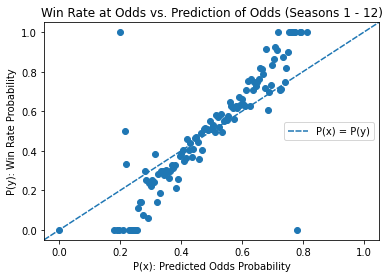

In [22]:
x = []
y = []

for partition_value in data:
    games = data[partition_value]
    if len(games) == 0:
        continue
    
    games_won = len(games[games['winningTeam'] == 'home'])
    games_lost = len(games) - games_won
    
    mu = games_won / len(games)
    y.append(mu)
    x.append(partition_value)

plt.scatter(x, y)
plt.title('Win Rate at Odds vs. Prediction of Odds (Seasons 1 - 12)')
plt.xlabel('P(x): Predicted Odds Probability')
plt.ylabel('P(y): Win Rate Probability')
plt.axline((0, 0), (1, 1), dashes=(4, 1, 4, 1), label='P(x) = P(y)')
plt.legend()
plt.savefig("win_rate_vs_prediction.jpg", dpi=200)
plt.show()